# The Sparks Foundation 

## Task 1: Data Science and Business Analytics Internship May'21

## Submission by - Abhishek Srivastav

Task: Prediction using Supervised Learning Model for the prediction of the percentage of the student based on his no of study hours

In [1]:
#importing libraries used in the prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data Succesfully loaded to dataframe df")

df.head(5)

Data Succesfully loaded to dataframe df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Lets plot a histogram for the dataframe df

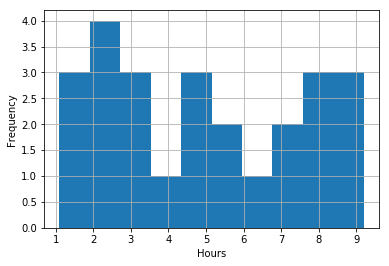

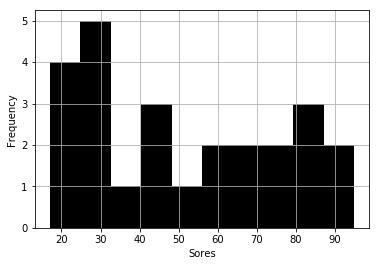

In [4]:
gym = df['Hours']

gym.hist()
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

gym = df['Scores']
gym.hist(color="black")
plt.xlabel('Sores')
plt.ylabel('Frequency')
plt.show()

Now lets plot the dataframe points on a graph (2D plane) and try to analyse the dataset

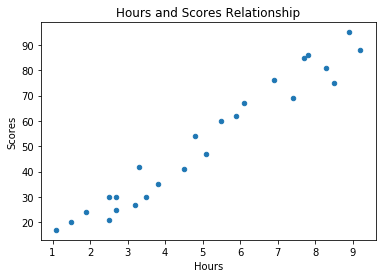

In [6]:
df.plot(x='Hours', y='Scores', kind='scatter')
plt.title('Hours and Scores Relationship')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

By looking at the above plotted graph, there appears to be positive linear relationship between no of hours studied and the score obtained

## Begining our predictive analysis
Lets take Hours as the inputs ('attributes') and Scores as the outputs ('labels')

In [32]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [42]:
# X.reshape(1,25)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [43]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Now lets split split this data into training and test sets.

In [41]:
#importing the module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Lets plot the training and the training sets and observe

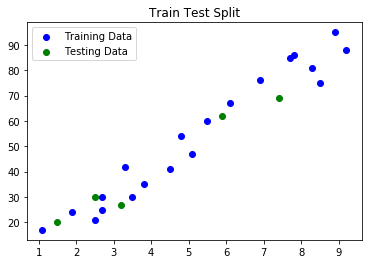

In [46]:
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Testing Data', color='green')

plt.legend()
plt.title('Train Test Split')
plt.show()

We have now split our data into training and test sets, now lets train our algoirthm
## Training the Algorithm

In [50]:
#importing the module
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train) #input of X_train needs to be 2D

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making Predictions

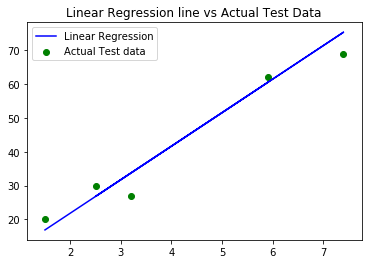

In [60]:
#Use the model to make predictions on TEST data
prediction = LR.predict(X_test)

#Prediction line
line = LR.coef_*X + LR.intercept_

#Plot prediction line against actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='blue')
plt.scatter(X_test, y_test, label='Actual Test data', color='green')

plt.legend()
plt.title('Linear Regression line vs Actual Test Data')
plt.show()

In [64]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Score of the student if he studies for 9.25 hrs/day

In [79]:
score = LR.predict([[9.25]]) #Input needs to be 2D array


print("No of hours the student studies per day: 9.25")
print('His predicted score: {}'.format(score[0]))

No of hours the student studies per day: 9.25
His predicted score: 93.69173248737539


## Evaluating/Scoring our model

In [83]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) 

Mean Absolute Error: 4.183859899002982


In [84]:
LR.score(X_test, y_test)

0.9454906892105354